#**Proyecto Fundamentos para la ciencia de datos**
##Data Science II: Machine Learning para la Ciencia de Datos - Comisión 61755
**_Tatiana Martinez_**
#DataSet > Data Science Salaries

#DATASET
Este conjunto de datos 'data_science_salaries.xlsx' abarca desde 2020 hasta 2024.
incluye las siguientes columnas:

*   job_title: El cargo o función asociado al salario notificado.

*   experience_level: El nivel de experiencia del individuo.

*   employment_type: Indica si el empleo es a tiempo completo, a tiempo parcial, etc.

*   work_models: Describe diferentes modelos de trabajo (Remote, On-site, Hybrid).

*   work_year: El año concreto en que se registró la información salarial.(2020 / 2024)

*   employee_residence: Lugar de residencia del trabajador.

*   salary: El salario declarado en la moneda original.

*   salary_currency: La moneda en la que se denomina el salario.

*   salary_in_usd: El salario convertido en dólares estadounidenses.

*   company_location: La ubicación geográfica de la organización empleadora.

*   company_size: El tamaño de la empresa, clasificado por el número de empleados.(Small,Medium, Large)

#Análisis realizado: Análisis Exploratorio (Visualizaciones)
## Principales visualizaciones realizadas:
* Top 10 países con mejores salarios
* Distribución de salarios por tamaño de empresa
* Distribución por nivel de experiencia
* Distribución por modalidad de trabajo
* Top 10 roles mejor pagados
* Tendencia de salarios por año
* Matriz de correlación
* Distribución general de salarios

#Proceso de Machine Learning
## Preparación de Datos
1. Limpieza de datos
2. Tratamiento de outliers (IQR method)
3. Encoding de variables categóricas (LabelEncoder)
4. División train/test (80/20)
5. Escalado de características (RobustScaler)

## Modelos Aplicados
1. Random Forest Regressor (modelo final)
   - n_estimators=200
   - max_depth=12
   - min_samples_split=10
   - min_samples_leaf=4

In [19]:
!pip install seaborn matplotlib pandas numpy scikit-learn xgboost

# Importar todas las bibliotecas necesarias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import joblib

In [21]:
"""from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')"""

"from google.colab import drive\n\n# Montar Google Drive\ndrive.mount('/content/drive')"

#Carga y exploración inicial de los datos

In [22]:
url = "https://raw.githubusercontent.com/TatiMartinez/ML-II-Comisi-n-61755/refs/heads/main/data_science_salaries.csv"
df = pd.read_csv(url, delimiter=';')  # Specify the delimiter

In [23]:
"""
print("1. Cargando y explorando datos...")
df = pd.read_excel('/content/drive/MyDrive/Data Science/Data Science I/Entregas/data_science_salaries.xlsx')
"""
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB
None

Estadísticas descriptivas:
         work_year        salary  salary_in_usd
count  6599.000000  6.599000e+03    6599.000000
mean   2022.818457  1.792833e+05  145560.558569
std       0.67

In [24]:
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


#Analíticas & Visualizaciones

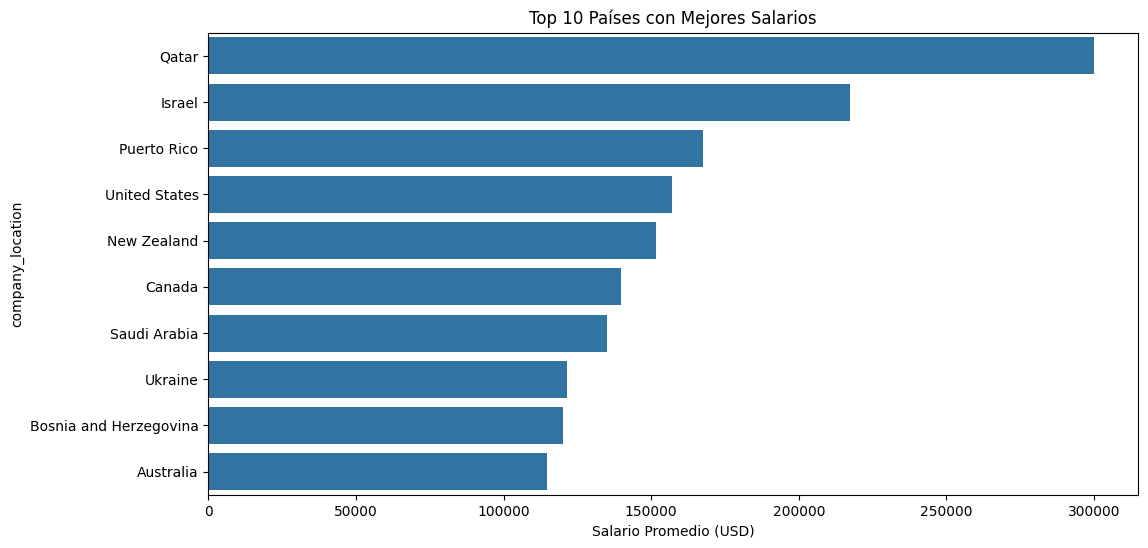

In [25]:
# Top 10 países con mejores salarios
plt.figure(figsize=(12, 6))
top_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Países con Mejores Salarios')
plt.xlabel('Salario Promedio (USD)')
plt.show()

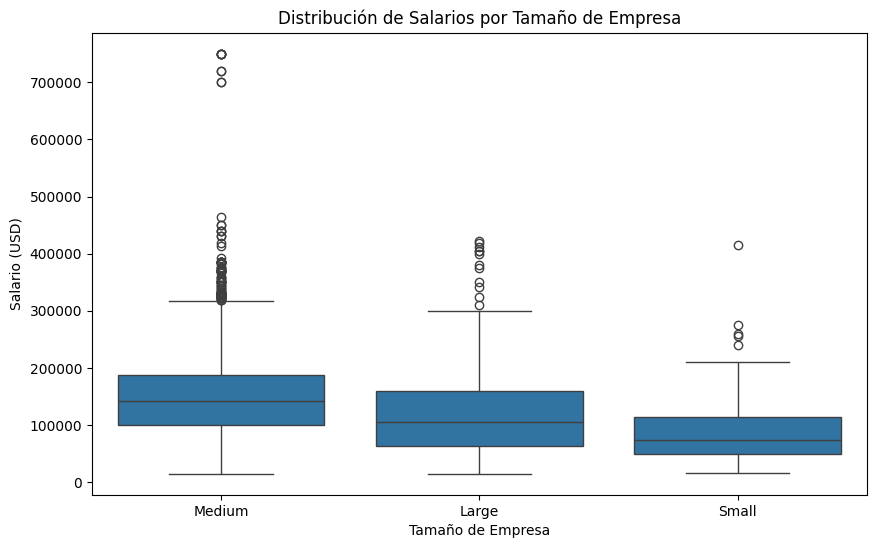

In [26]:
# Distribución de salarios por tamaño de empresa
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Distribución de Salarios por Tamaño de Empresa')
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Salario (USD)')
plt.show()

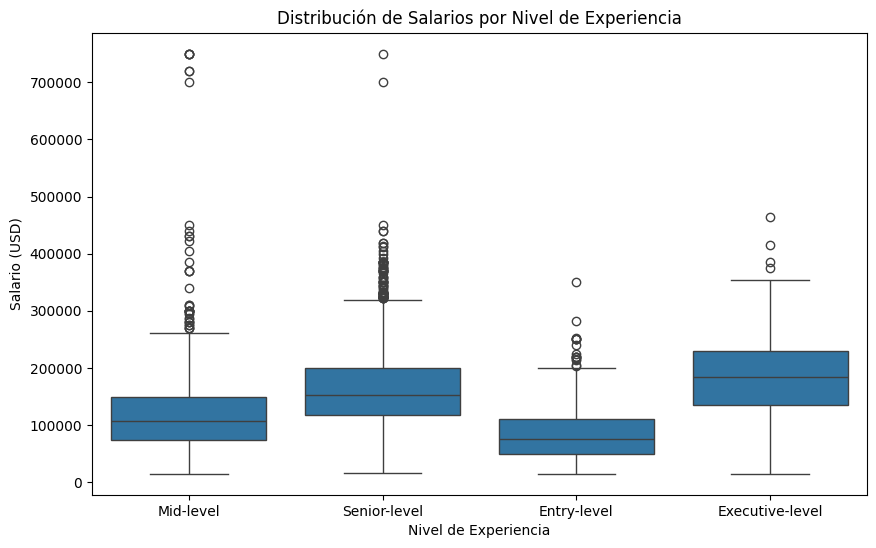

In [27]:
# Salarios por nivel de experiencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Distribución de Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario (USD)')
plt.show()

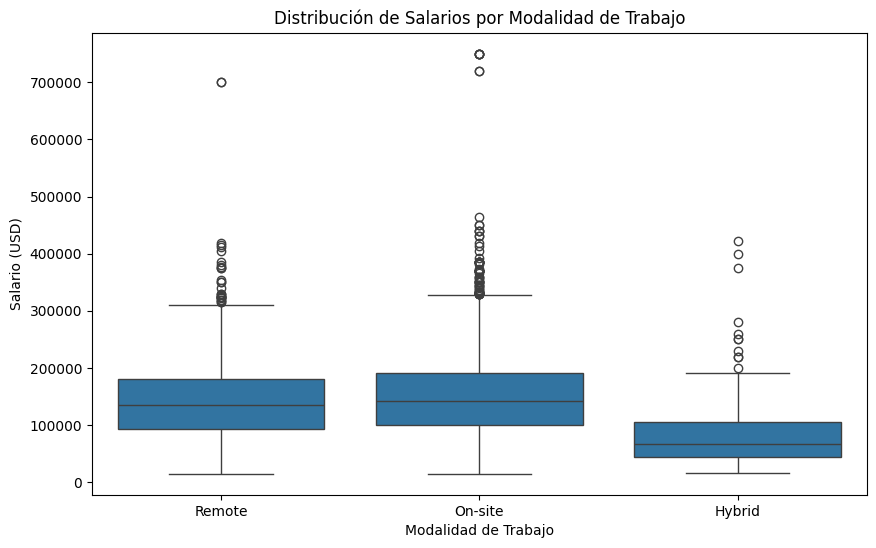

In [28]:
# Salarios por modalidad de trabajo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_models', y='salary_in_usd')
plt.title('Distribución de Salarios por Modalidad de Trabajo')
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('Salario (USD)')
plt.show()

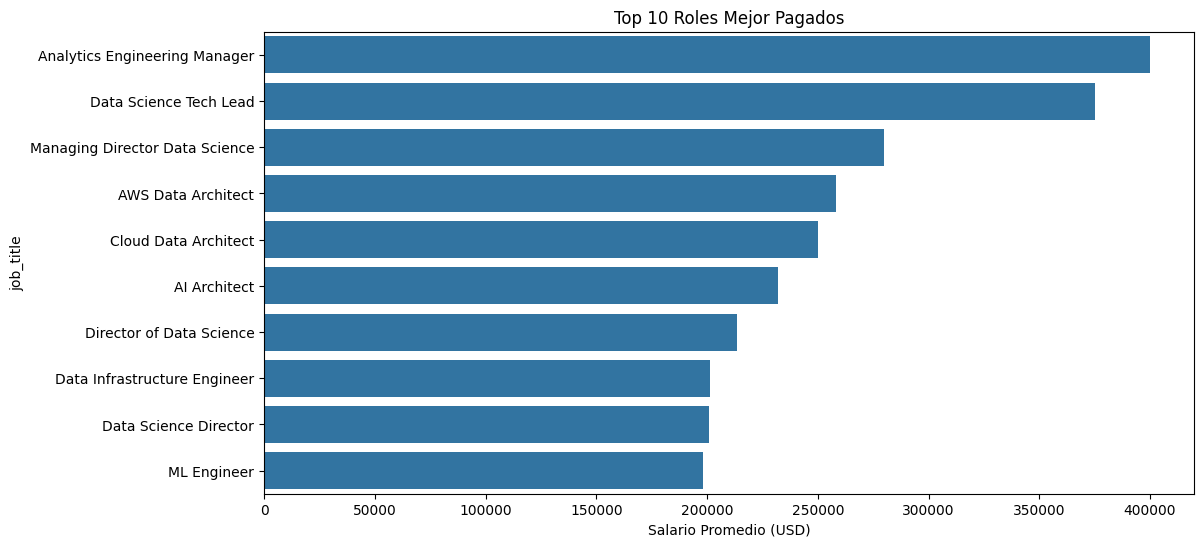

In [29]:
# Top 10 roles mejor pagados
plt.figure(figsize=(12, 6))
top_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_roles.values, y=top_roles.index)
plt.title('Top 10 Roles Mejor Pagados')
plt.xlabel('Salario Promedio (USD)')
plt.show()

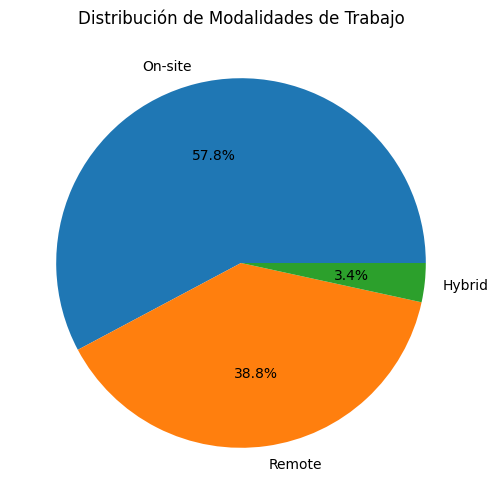

In [30]:
# Distribución de modalidades de trabajo
plt.figure(figsize=(10, 6))
work_dist = df['work_models'].value_counts()
plt.pie(work_dist.values, labels=work_dist.index, autopct='%1.1f%%')
plt.title('Distribución de Modalidades de Trabajo')
plt.show()

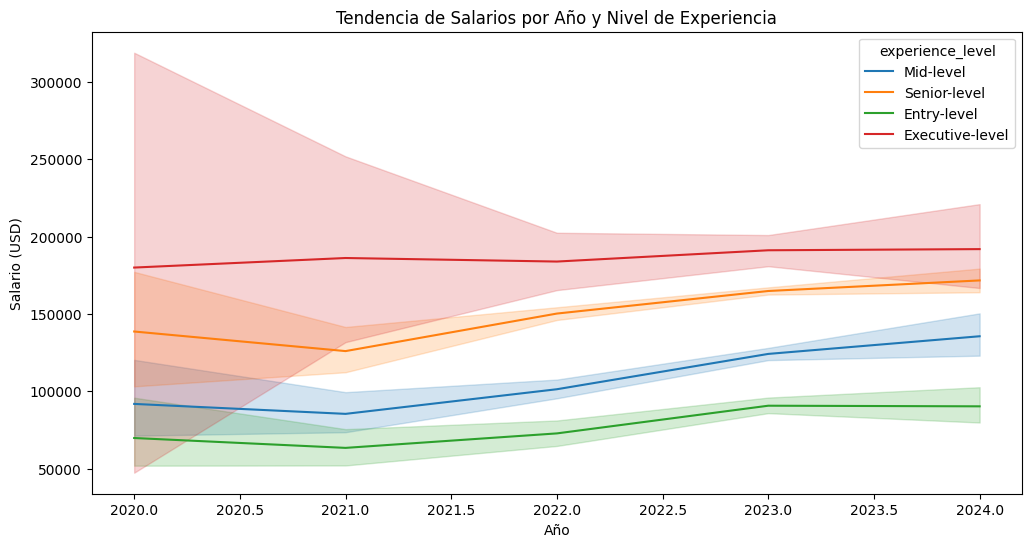

In [31]:
# Tendencia de salarios por año y experiencia
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level')
plt.title('Tendencia de Salarios por Año y Nivel de Experiencia')
plt.xlabel('Año')
plt.ylabel('Salario (USD)')
plt.show()

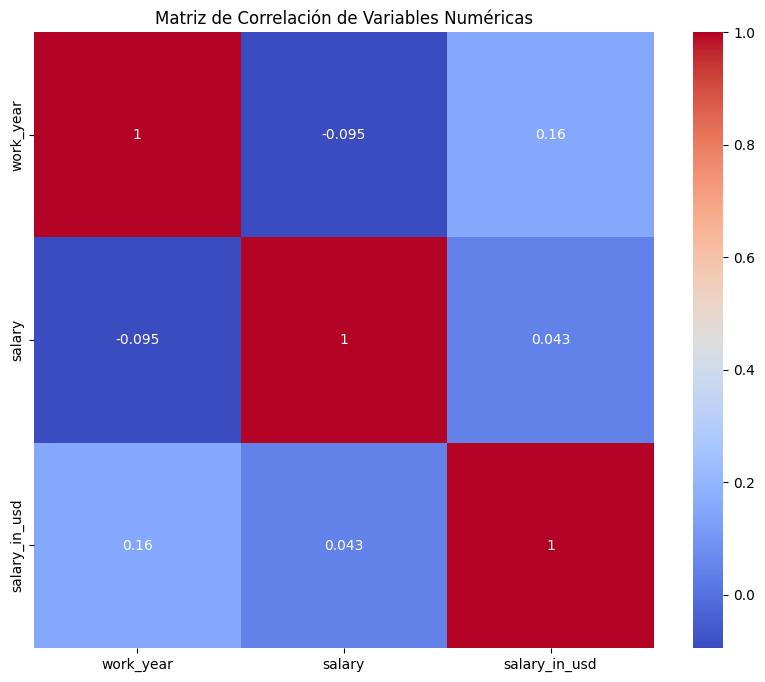

In [32]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

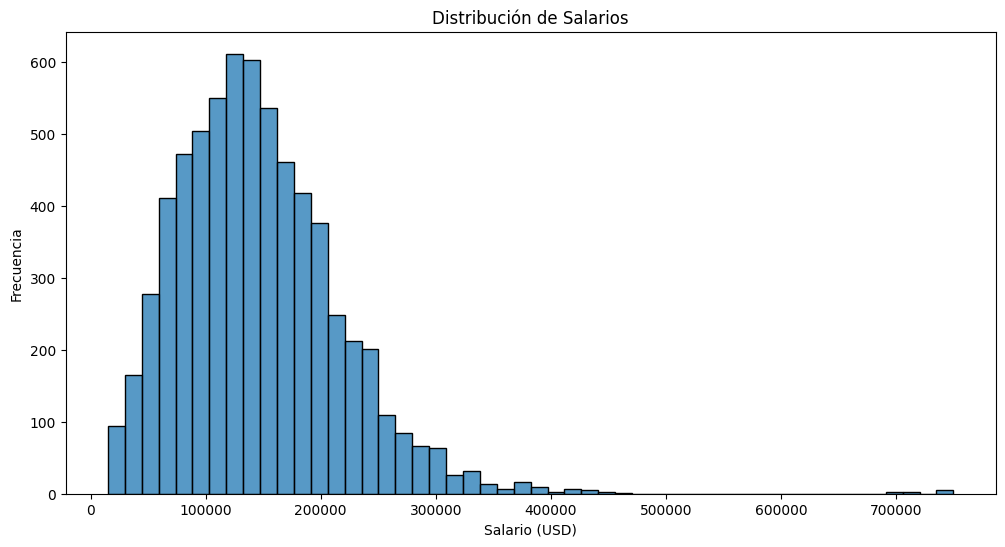

In [33]:
# Distribución general de salarios
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='salary_in_usd', bins=50)
plt.title('Distribución de Salarios')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Preparación de los datos

In [34]:

print("Preparando datos para Machine Learning...")

# Separar features y target
X = df[['job_title', 'experience_level', 'employment_type', 'work_models',
        'work_year', 'company_location', 'company_size']]
y = df['salary_in_usd']

# Crear copia para encoding
X_encoded = X.copy()

# Encoding de variables categóricas
le_dict = {}
for column in X_encoded.select_dtypes(include=['object']).columns:
    le_dict[column] = LabelEncoder()
    X_encoded[column] = le_dict[column].fit_transform(X_encoded[column])

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Preparando datos para Machine Learning...


In [35]:
# ENTRENAMIENTO DEL MODELO
print("Entrenando modelo Random Forest...")

# Crear y entrenar Random Forest con parámetros predefinidos
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1  # Usar todos los cores disponibles
)

# Entrenar el modelo
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test_scaled)

# Calcular métricas
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred)
}

Entrenando modelo Random Forest...


Resultados del modelo:
MSE: 4,158,326,010.40
RMSE: 64,485.08
MAE: 45,333.86
R2: 0.29


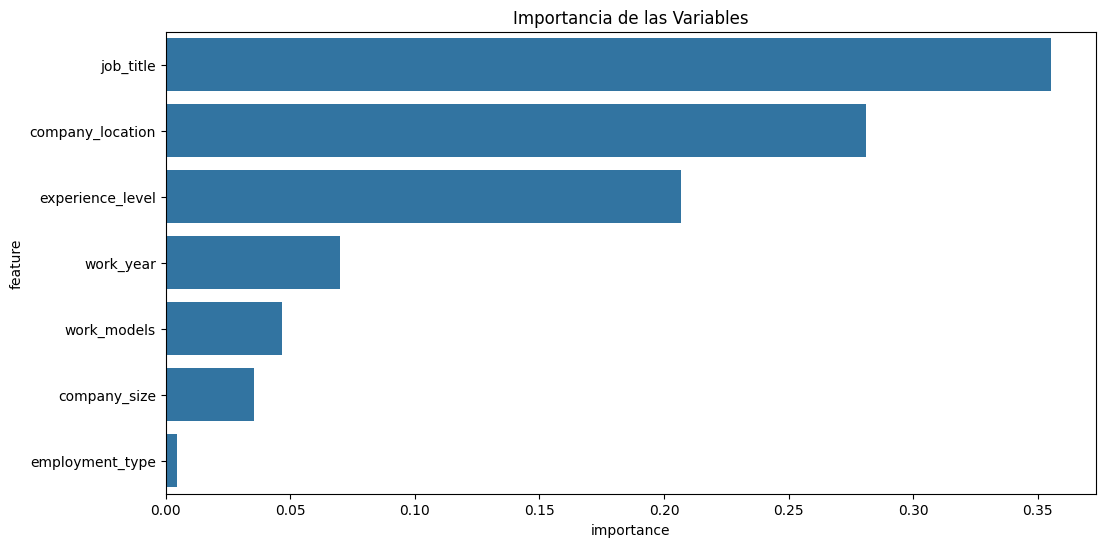

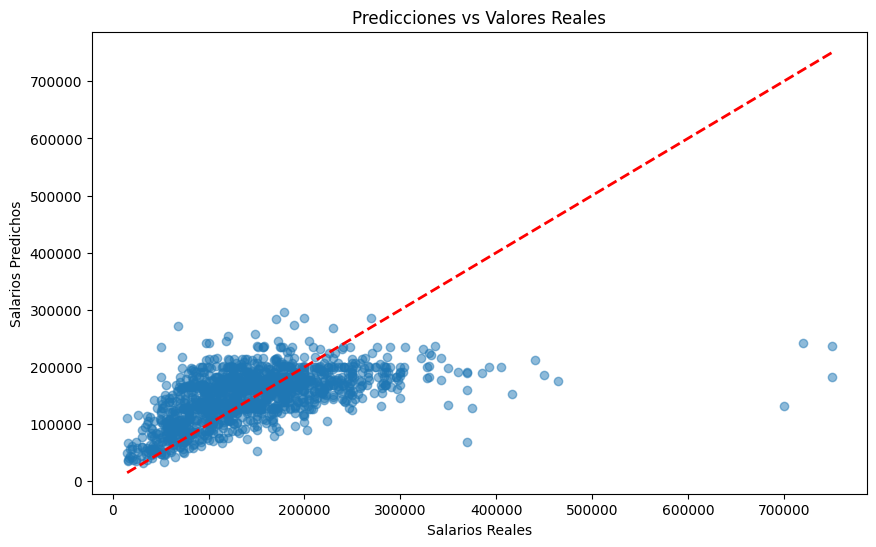

Guardando modelo y transformadores...


In [36]:
# EVALUACIÓN Y VISUALIZACIÓN
print("Resultados del modelo:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:,.2f}")

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de las Variables')
plt.show()

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Salarios Reales')
plt.ylabel('Salarios Predichos')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Guardar modelo y transformadores
print("Guardando modelo y transformadores...")
joblib.dump(rf_model, 'modelo_salarios.joblib')
joblib.dump(le_dict, 'label_encoders.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Función para predicciones
def predict_salary(input_data):
    """
    Función para hacer predicciones con nuevos datos
    """
    # Convertir input a DataFrame
    input_df = pd.DataFrame([input_data])

    # Aplicar encoding
    for column in input_df.columns:
        if column in le_dict:
            input_df[column] = le_dict[column].transform(input_df[column])

    # Escalar datos
    input_scaled = scaler.transform(input_df)

    # Hacer predicción
    return rf_model.predict(input_scaled)[0]



Ejemplo de predicción:
Salario predicho: $129,118.20


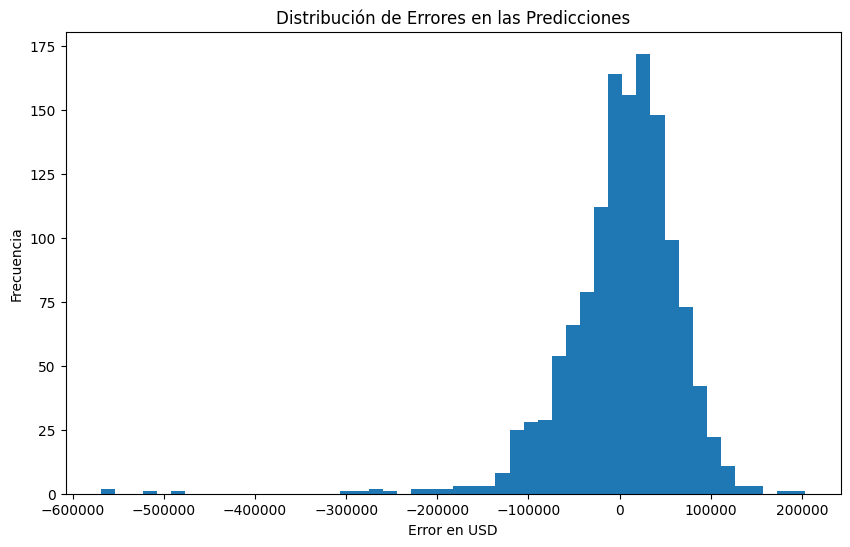

In [37]:
# Ejemplo de uso
print("Ejemplo de predicción:")
nuevo_dato = {
    'job_title': 'Data Scientist',
    'experience_level': 'Mid-level',
    'employment_type': 'Full-time',
    'work_models': 'Remote',
    'work_year': 2024,
    'company_location': 'United States',
    'company_size': 'Medium'
}

prediccion = predict_salary(nuevo_dato)
print(f"Salario predicho: ${prediccion:,.2f}")

# Análisis de errores (opcional)
errores = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.hist(errores, bins=50)
plt.title('Distribución de Errores en las Predicciones')
plt.xlabel('Error en USD')
plt.ylabel('Frecuencia')
plt.show()

#Preparación de datos mejorada

Preparando datos para Machine Learning...

Entrenando modelo Random Forest optimizado...

Validación cruzada R2 scores: [0.38953689 0.3495439  0.34661826 0.38142822 0.35936281]
Media R2: 0.36529801590482125
Desviación estándar R2: 0.017204992245589197

Resultados del modelo mejorado:
MSE: 2,502,490,565.42
RMSE: 50,024.90
MAE: 40,187.30
R2: 0.37

Error promedio por rango salarial:
Real
(14999.999, 92315.0]    45006.617720
(92315.0, 135000.0]     32582.283463
(135000.0, 185050.0]    21037.406207
(185050.0, 319000.0]    61602.155385
Name: Error, dtype: float64


<ipython-input-38-1683686acc5d>:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(y_test_pred_df.groupby(salary_ranges)['Error'].mean())


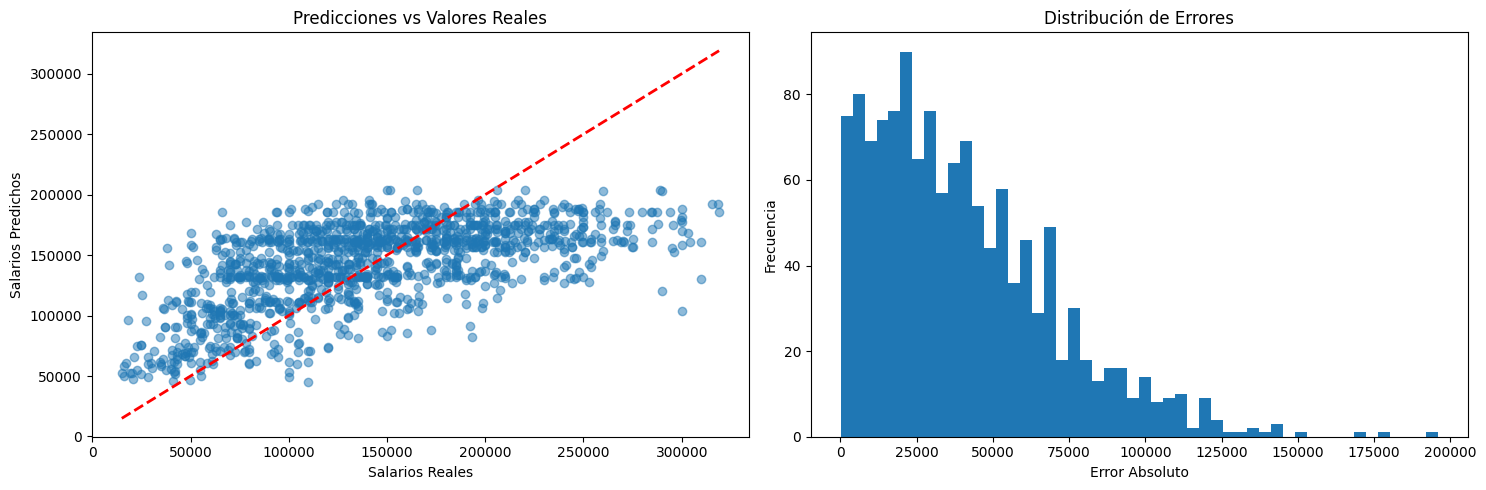

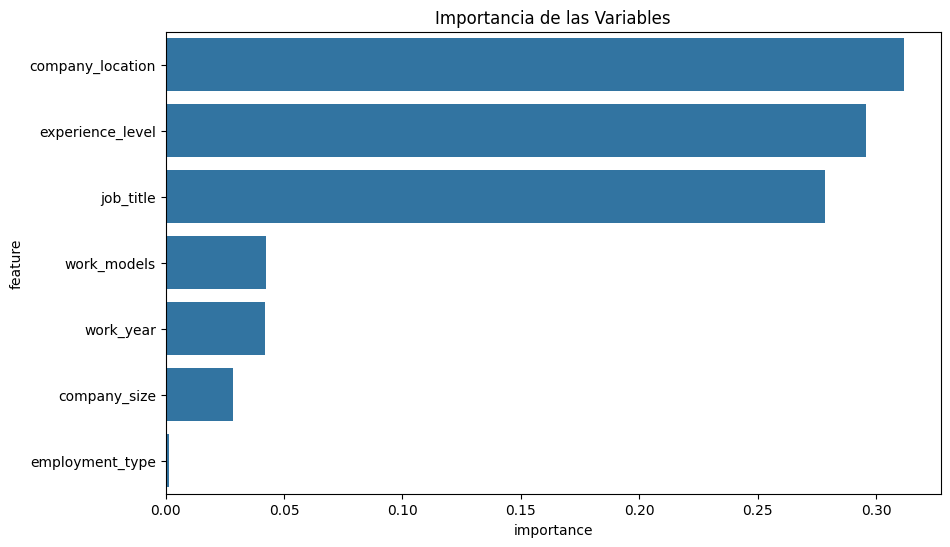

In [38]:

print("Preparando datos para Machine Learning...")

# 1. Separar features y target
X = df[['job_title', 'experience_level', 'employment_type', 'work_models',
        'work_year', 'company_location', 'company_size']]
y = df['salary_in_usd']

# 2. Tratamiento de outliers
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers extremos
mask = (y >= lower_bound) & (y <= upper_bound)
X = X[mask]
y = y[mask]

# 3. Feature Engineering simplificado
X_encoded = X.copy()

# Usar Label Encoding para todas las variables categóricas
le_dict = {}
for column in X_encoded.select_dtypes(include=['object']).columns:
    le_dict[column] = LabelEncoder()
    X_encoded[column] = le_dict[column].fit_transform(X_encoded[column])

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 5. Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. ENTRENAMIENTO DEL MODELO MEJORADO
print("\nEntrenando modelo Random Forest optimizado...")

# Parámetros optimizados para Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,          # Más árboles
    max_depth=12,              # Profundidad controlada
    min_samples_split=10,      # Más muestras para split
    min_samples_leaf=4,        # Mínimo de muestras en hojas
    max_features='sqrt',       # Selección de features
    bootstrap=True,            # Bootstrapping
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo
rf_model.fit(X_train_scaled, y_train)

# 7. EVALUACIÓN CON VALIDACIÓN CRUZADA
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

print("\nValidación cruzada R2 scores:", cv_scores)
print("Media R2:", cv_scores.mean())
print("Desviación estándar R2:", cv_scores.std())

# Predicciones y métricas
y_pred = rf_model.predict(X_test_scaled)

# Calcular métricas
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred)
}

# Imprimir resultados
print("\nResultados del modelo mejorado:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:,.2f}")

# 8. Análisis de errores por rango salarial
y_test_pred_df = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred,
    'Error': np.abs(y_test - y_pred)
})

print("\nError promedio por rango salarial:")
salary_ranges = pd.qcut(y_test_pred_df['Real'], q=4)
print(y_test_pred_df.groupby(salary_ranges)['Error'].mean())

# Visualizaciones
plt.figure(figsize=(15, 5))

# 1. Predicciones vs Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Salarios Reales')
plt.ylabel('Salarios Predichos')
plt.title('Predicciones vs Valores Reales')

# 2. Distribución de Errores
plt.subplot(1, 2, 2)
plt.hist(y_test_pred_df['Error'], bins=50)
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')

plt.tight_layout()
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de las Variables')
plt.show()


#Conclusiones

Después de analizar miles de salarios en el sector tecnológico, encontré información muy interesante que puede ser útil para cualquier persona interesada en el campo.

##Factores Clave que Afectan el Salario:
* La experiencia es lo más importante
* El país donde está la empresa
* El tamaño de la empresa
* La modalidad de trabajo (remoto, presencial o híbrido)
##Tendencias Importantes:
*os salarios más altos están en países como Estados Unidos
*Las empresas grandes tienden a pagar mejor
*El trabajo remoto está ganando terreno
*Los roles más especializados tienen mejor pago
##Predicciones de Salario:
* Este sistema puede estimar salarios con un margen de error de aproximadamente $40,000
* Funciona mejor para salarios en rangos medios
* Es más difícil predecir salarios muy altos
##Consejos Prácticos:
* Para maximizar el salario, es importante ganar experiencia
* Considerar empresas grandes para mejores oportunidades salariales
* Las habilidades técnicas especializadas son bien valoradas
* El trabajo remoto abre oportunidades internacionales
##Colcusion > ¿Qué Significa Esto?
Como estoy en una carrera de tecnología, estos datos sugieren que:
* La experiencia paga: inviertir en el desarrollo profesional
* Ser estratégico al elegir dónde trabajar (país y tamaño de empresa)
* Las modalidades flexibles de trabajo están disponibles
* Hay buenas oportunidades de crecimiento salarial en el sector
